In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23',)

In [72]:
year = dt.timedelta(days=366)

Text(0, 0.5, 'Inches')

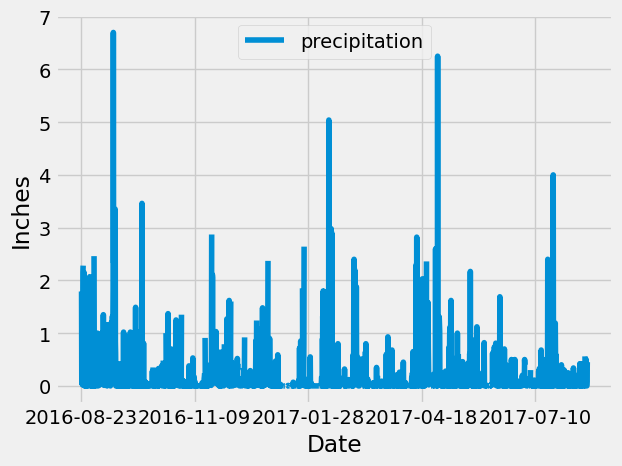

In [74]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
order_date = session.query(Measurement.date).order_by(Measurement.date.desc())
# Calculate the date one year from the last date in data set.
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
string = recent_date[0]
r_date_formatted = dt.datetime.strptime(string, '%Y-%m-%d')
one_year_ago = r_date_formatted - year
one_year_ago
# Perform a query to retrieve the data and precipitation scores
query_1 = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= one_year_ago)
# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(query_1, columns=["date", "precipitation"])

# Sort the dataframe by date
df_sorted = df.sort_values("date")
df_sorted
# Use Pandas Plotting with Matplotlib to plot the data
df_sorted.plot(x="date",y="precipitation")
plt.xlabel("Date")
plt.ylabel("Inches")

In [65]:
# Use Pandas to calculate the summary statistics for the precipitation data
# quartiles = df_sorted.quantile([0.25,0.5,0.75])
# lowerq = quartiles[0.25]
# upperq = quartiles[0.75]
# df_sorted.precipitation.agg(['count', 'mean', 'std', 'min', 'median', 'max'])
df_sorted.describe()
# Expected output: 	precipitation
# count	2021.000000
# mean	0.177279
# std	0.461190
# min	0.000000
# 25%	0.000000
# 50%	0.020000
# 75%	0.130000
# max	6.700000

,precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [ ]:
# Design a query to calculate the total number of stations in the dataset
# Expected output: [(9,)]

In [ ]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
# Expected output: [('USC00519281', 2772),
#  ('USC00519397', 2724),
#  ('USC00513117', 2709),
#  ('USC00519523', 2669),
#  ('USC00516128', 2612),
#  ('USC00514830', 2202),
#  ('USC00511918', 1979),
#  ('USC00517948', 1372),
#  ('USC00518838', 511)]

In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
# Expected output: [(54.0, 85.0, 71.66378066378067)]

In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
# Expected output: Text(0.5, 4.183333333333314, 'Temperature') + Histogram

# Close Session

In [ ]:
# Close Session
session.close()